## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
train = pd.read_csv('./train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#타이타닉 시각화
#1) 생존여부를 원형그래프, 막대그래프
#2) pclass 막대그래프
#3) Pclass에 따른 사망, 생존여부 그래프
#4) 원형그래프 사망-Pclass, 생존-Pclass 비율 확인
#5) Pclass와 가격의 차이 막대 그래프
#(Fare의 값 확인 후 평균으로 할지, 최대-최소의 차이로 진행할지 선택)
#6) 성별에 따른 원형그래프, 막대그래프
#7) 성별에 따른 생존, 사망 여부 막대그래프

In [4]:
train.info()
#결측치, 생존여부와 연관성이 있는 컬럼 구분
#특성으로 사용할 수 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 1) 생존여부를 원형그래프, 막대그래프

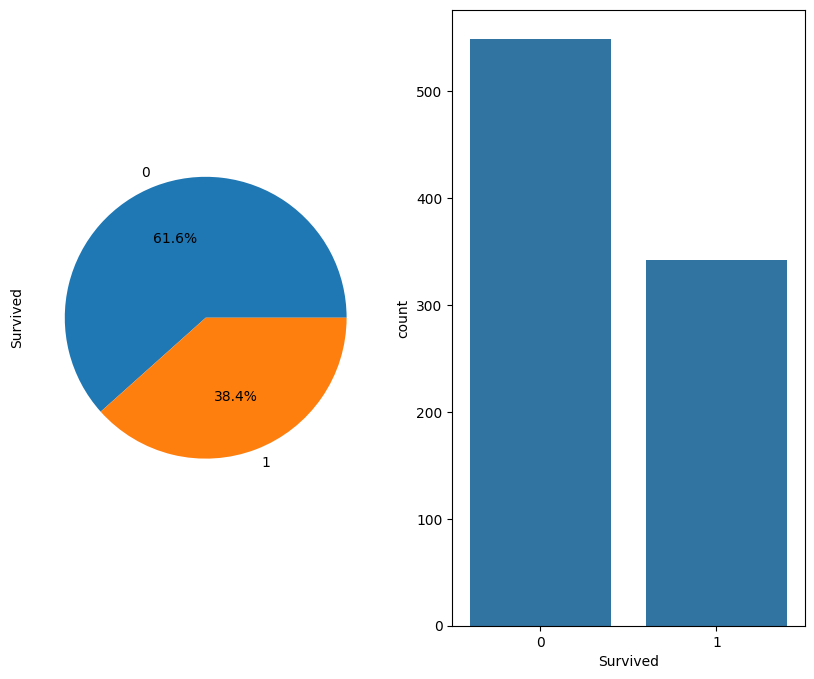

In [6]:
figure, axes = plt.subplots(1,2,figsize=(10,8))

labels = ['0','1']
train['Survived'].value_counts().plot.pie(ax=axes[0],autopct="%.1f%%", labels=labels)

sns.countplot(data=train, x='Survived', ax=axes[1] )
plt.show()

In [7]:
#name 컬럼
train['Name'].unique()
#성씨에 따른 탑승비율 등 내가 확인하고자 하는 것을 명확히 생각하고 분석

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [8]:
#Pclass 컬럼확인
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Pclass 막대그래프

In [9]:
#sns.countplot(data=train, )

In [10]:
#Pclass에 따른 Survived의 평균
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Pclass에 대한 사망, 생존여부 그래프

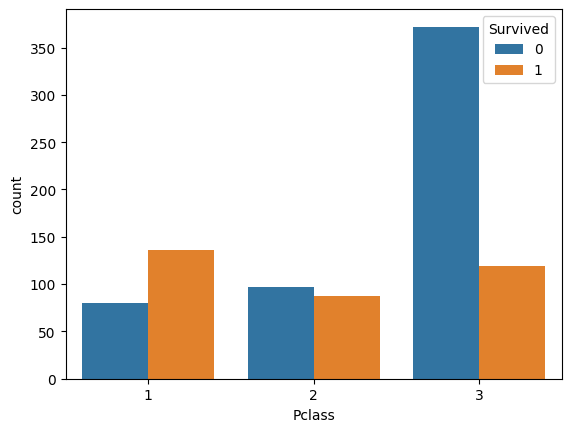

In [11]:
sns.countplot(data=train, x='Pclass', hue= 'Survived')
plt.show()

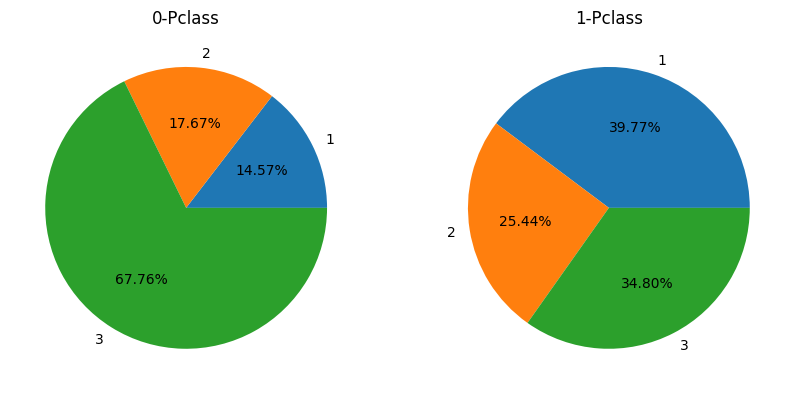

In [12]:
#pie() 사망0-Pclass, 생존1-Pclass
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
train[train['Survived']==0]['Pclass'].value_counts().sort_index().plot.pie(ax = axes[0],
                                                                          autopct="%.2f%%")
axes[0].set(ylabel='', title='0-Pclass')
train[train['Survived']==1]['Pclass'].value_counts().sort_index().plot.pie(ax = axes[1],
                                                                          autopct="%.2f%%")
axes[1].set(ylabel='', title='1-Pclass')
plt.show()

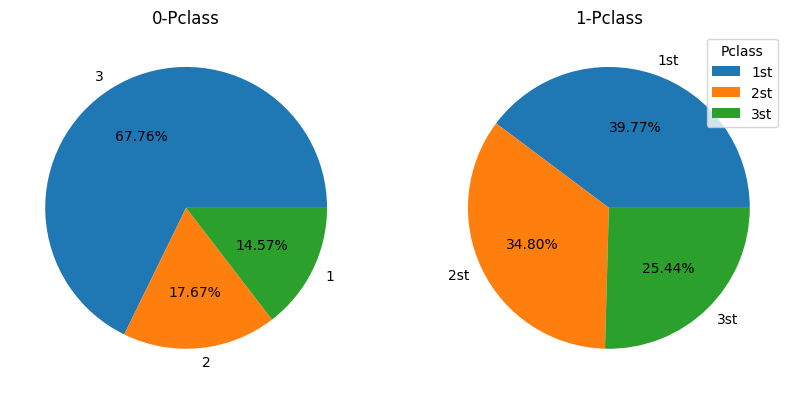

In [13]:
#pie() 사망0-Pclass, 생존1-Pclass
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
labels = ['1st', '2st','3st']
train[train['Survived']==0]['Pclass'].value_counts().plot.pie(ax = axes[0],
                                                        autopct="%.2f%%")
axes[0].set(ylabel='', title='0-Pclass')
train[train['Survived']==1]['Pclass'].value_counts().plot.pie(ax = axes[1],
                                                        autopct="%.2f%%", labels=labels)
axes[1].set(ylabel='', title='1-Pclass')
plt.legend(title='Pclass', labels=labels)

plt.show()

## Pclass와 가격의 차이 막대그래프


In [14]:
#1. Fare 컬럼 확인
train['Fare']

#2. Fare 컬럼의 유니크한 값들을 확인
train['Fare'].unique()
#금액의 다름을 확인

#평균으로 구할지,  최대값-최소값 구할지 생각
data = train.groupby('Pclass')['Fare'].describe()
# train[train['Fare']==0.0].value_counts()
data

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [15]:
data = train.groupby('Pclass')['Fare'].mean().reset_index()
#.reset_index() 시리즈 타입 -> 판다스 타입으로 변환
data

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


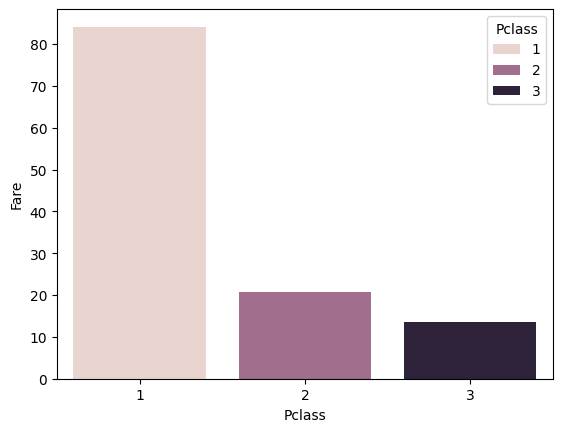

In [16]:
# Pclass별 평균 가격차이 막대그래프 확인
#labels=['1st','2nd','3rd']
sns.barplot(data=data,x='Pclass', y="Fare",  hue="Pclass")
plt.show()
#matplotlib => labels 값을 지정해야하지만
#barplot() => 범례를 자동으로 생성하기 때문에 hue 옵션만 추가하면된다

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 성별에 따른 원형 그래프, 막대그래프 그리기

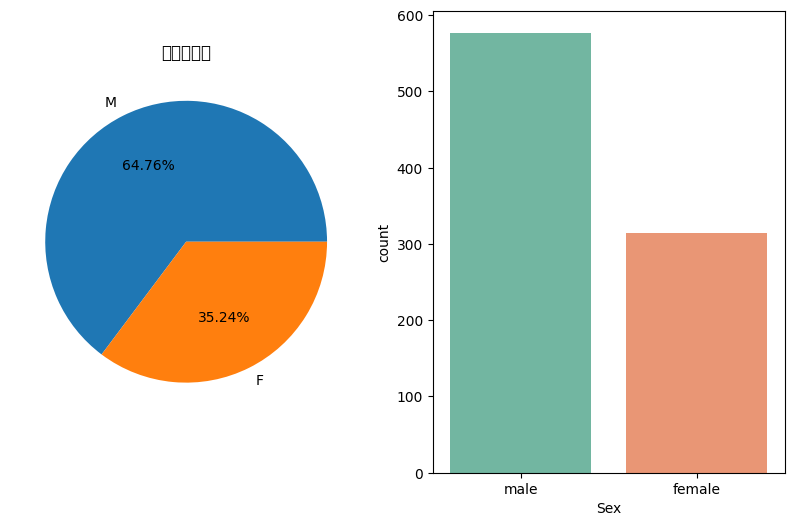

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))
labels = ['M', 'F']

#남성, 여성 탑승자 비율 원형그래프
train['Sex'].value_counts().plot.pie(ax=axes[0], autopct="%.2f%%", labels=labels)
axes[0].set(ylabel='', title='원형그래프')

#남성, 여성 탑승자 인원 막대그래프
sns.countplot(data = train, x='Sex', ax=axes[1],palette='Set2')

plt.show()

In [20]:
#남성 탑승객이 여성탑승객보다 많다
#성별과 생존여부 확인
train[['Sex','Survived']].groupby(['Sex'], as_index=False).value_counts()

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


# 남성, 여성의 생존과 사망 여부 그래프

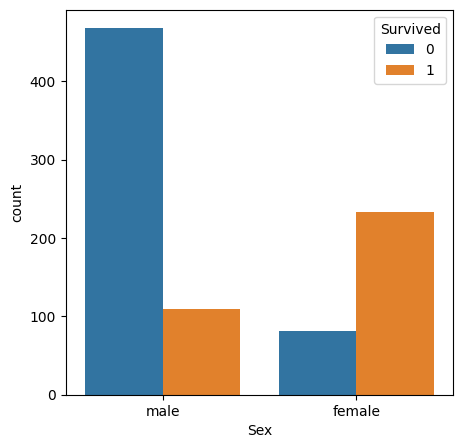

In [22]:
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes)
plt.show()

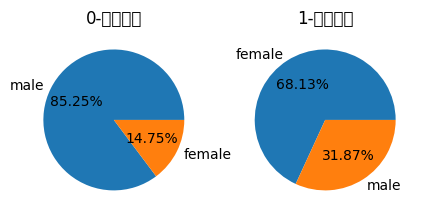

In [23]:
# 성별의 생존/사망 비율확인(pie() 0,1)
fig, axes = plt.subplots(1,2, figsize = (5,5))

#Survived 0인 데이터 이용한 pie() => 소수점 2자리까지 출력(왼쪽)
train[train['Survived']==0]['Sex'].value_counts().plot.pie(ax=axes[0], autopct='%.2f%%')
axes[0].set(ylabel='', title='0-성별비율')
#Survived 1인 데이터 이용한 pie() => 소수점 2자리까지 출력(오른쪽)
train[train['Survived']==1]['Sex'].value_counts().plot.pie(ax=axes[1], autopct='%.2f%%')
axes[1].set(ylabel='', title='1-성별비율')

plt.show()

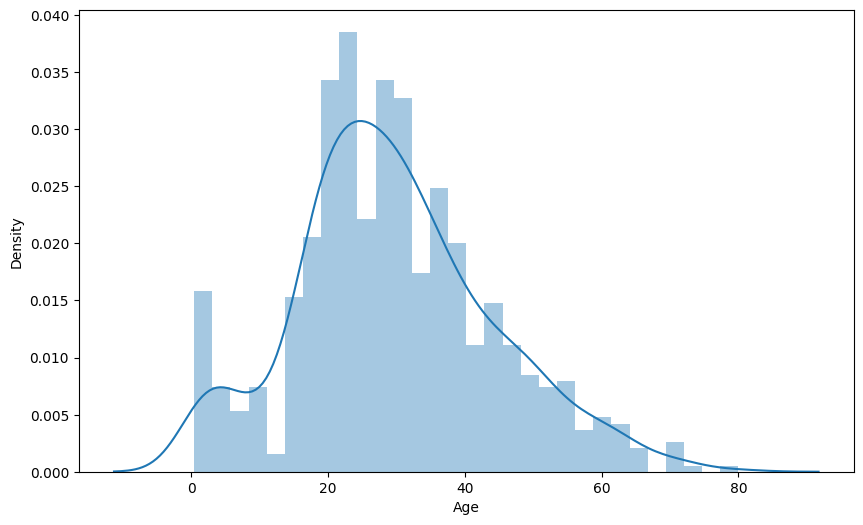

In [25]:
train["Age"].isnull().sum()

#나이 확인 => 결측값이 있음
#수치형으로 데이터가 존재함 => 분포그래프 이용함
fig, axes = plt.subplots(figsize=(10, 6))
sns.distplot(train['Age'], bins=30, ax=axes)
plt.show()

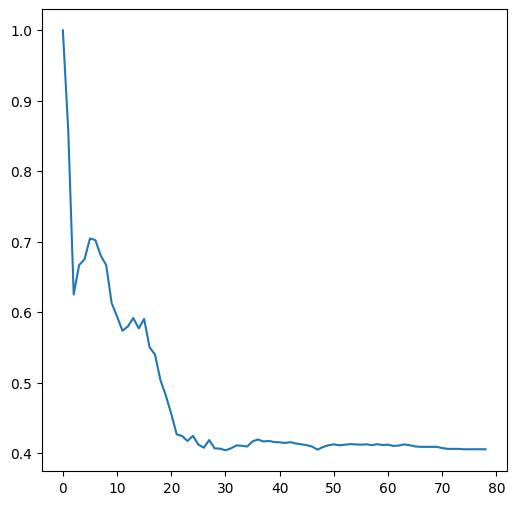

In [26]:
#Age와 Survived의 관계 확인
# 1~80
# 나이에 따른 생존 인월수를 전체 해당 나이로 나눈다

#생존율을 입력받을 리스트 생성
result = []

train[train['Age'] < 20]['Survived'].sum() #생존인원을 알 수 있다


for i in range(1, 80):
    result.append(train[train['Age'] < i]['Survived'].sum()
                  / len(train[train['Age'] < i ]['Survived']))
# print(result)

#생존그래프
plt.figure(figsize=(6, 6))
plt.plot(result)
plt.show()


[1.0, 0.8571428571428571, 0.625, 0.6666666666666666, 0.675, 0.7045454545454546, 0.7021276595744681, 0.68, 0.6666666666666666, 0.6129032258064516, 0.59375, 0.5735294117647058, 0.5797101449275363, 0.5915492957746479, 0.5769230769230769, 0.5903614457831325, 0.55, 0.5398230088495575, 0.5035971223021583, 0.4817073170731707, 0.45555555555555555, 0.4264705882352941, 0.42424242424242425, 0.41700404858299595, 0.4244604316546763, 0.4119601328903654, 0.40752351097178685, 0.41839762611275966, 0.4065934065934066, 0.40625, 0.40389294403892945, 0.40654205607476634, 0.4107142857142857, 0.4103671706263499, 0.4091858037578288, 0.4164989939637827, 0.41923076923076924, 0.41634980988593157, 0.4171322160148976, 0.41560798548094374, 0.41519434628975266, 0.4143356643356643, 0.4153846153846154, 0.4135593220338983, 0.41235392320534225, 0.4110929853181077, 0.4090909090909091, 0.4048, 0.4085173501577287, 0.4109375, 0.4123076923076923, 0.410958904109589, 0.4117647058823529, 0.4126506024096386, 0.41220238095238093,

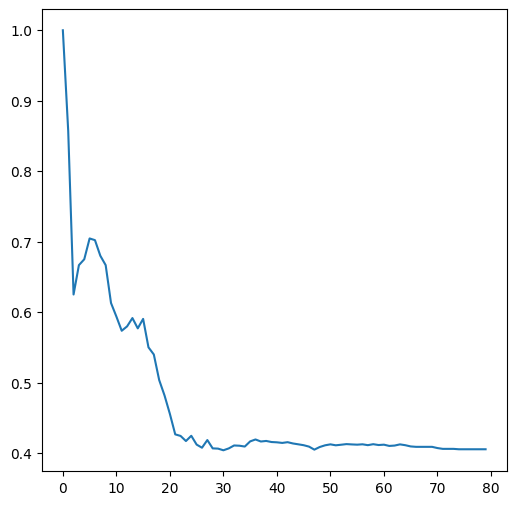

In [27]:
#Age와 Survived의 관계 확인
#1~80
#나이에 따른 생존 인원수를 전체 해당 나이로 나눈다

#생존율을 입력받을 리스트 생성
result = []

train[train['Age'] < 20]['Survived'].sum() #생존인원을 알 수 있다


for i in range(1, 81):
    count = train[train['Age'] < i]['Survived'].sum()
    total = len(train[train['Age']< i]['Survived']) #나이가 i미만인 총 탑승객
    if total > 0:
        rate = count / total
        result.append(rate)
    else:
        result.append(0)
print(result)
# print(result)

#생존그래프

plt.figure(figsize=(6, 6))
plt.plot(result)
plt.show()

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


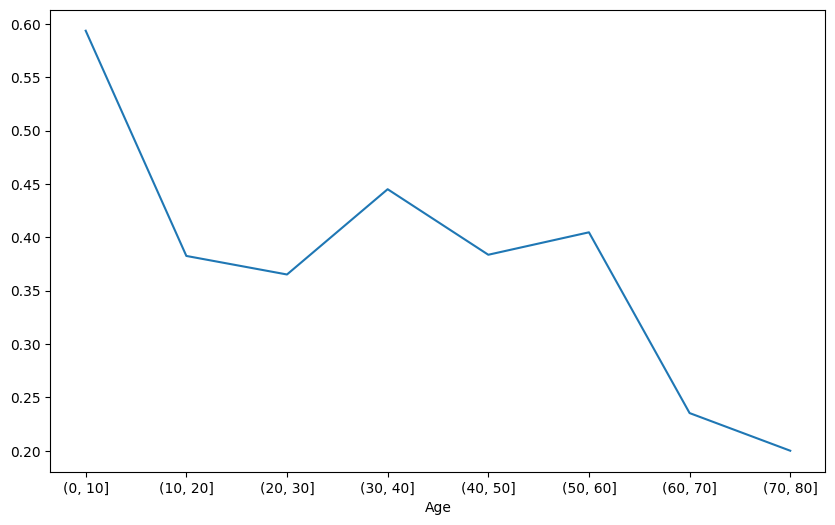

In [31]:
# 나이 구간 설정
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

#각 구간별 생존자 수와 전체 승객수 계산
result1 = train.groupby(pd.cut(train['Age'], bins=bins))['Survived'].sum()
total = train.groupby(pd.cut(train['Age'], bins=bins))['Survived'].count()
# print(total)
# print(result1)
#cut() : 연속형 데이터를 구간으로 나누는데 사용

#생존율 계산
rate = result1 / total
print(rate)

plt.figure(figsize=(10, 6))
rate.plot()
plt.show()

In [32]:
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

bins = [0, 5, 10]
labels = ['low', 'high']

pd.cut(data, bins=bins, labels=labels)

# data

0     low
1     low
2     low
3     low
4     low
5    high
6    high
7    high
8    high
9    high
dtype: category
Categories (2, object): ['low' < 'high']